In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [108]:
data=pd.read_excel(r'Data_train.xlsx')
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [109]:
data.shape

(10683, 11)

In [110]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [111]:
data=data.dropna(axis=0)

In [112]:
data["Airline"].value_counts()
data["Source"].value_counts()
data["Destination"].value_counts()
data["Route"].value_counts()
data["Total_Stops"].value_counts()
data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [113]:
data.drop(columns=["Date_of_Journey","Dep_Time","Arrival_Time"],inplace=True)

In [114]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302


In [115]:
data_frame=["Airline","Source","Destination","Route","Duration","Total_Stops","Additional_Info"]

In [116]:
from sklearn.preprocessing import LabelEncoder

data[data_frame]=data[data_frame].apply(LabelEncoder().fit_transform)  
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,18,240,4,8,3897
1,1,3,0,84,336,1,8,7662
2,4,2,1,118,106,1,8,13882
3,3,3,0,91,311,0,8,6218
4,3,0,5,29,303,0,8,13302
5,8,3,0,64,235,4,8,3873
6,4,0,5,5,65,0,5,11087
7,4,0,5,5,145,0,8,22270
8,4,0,5,5,185,0,5,11087
9,6,2,1,104,341,0,8,8625


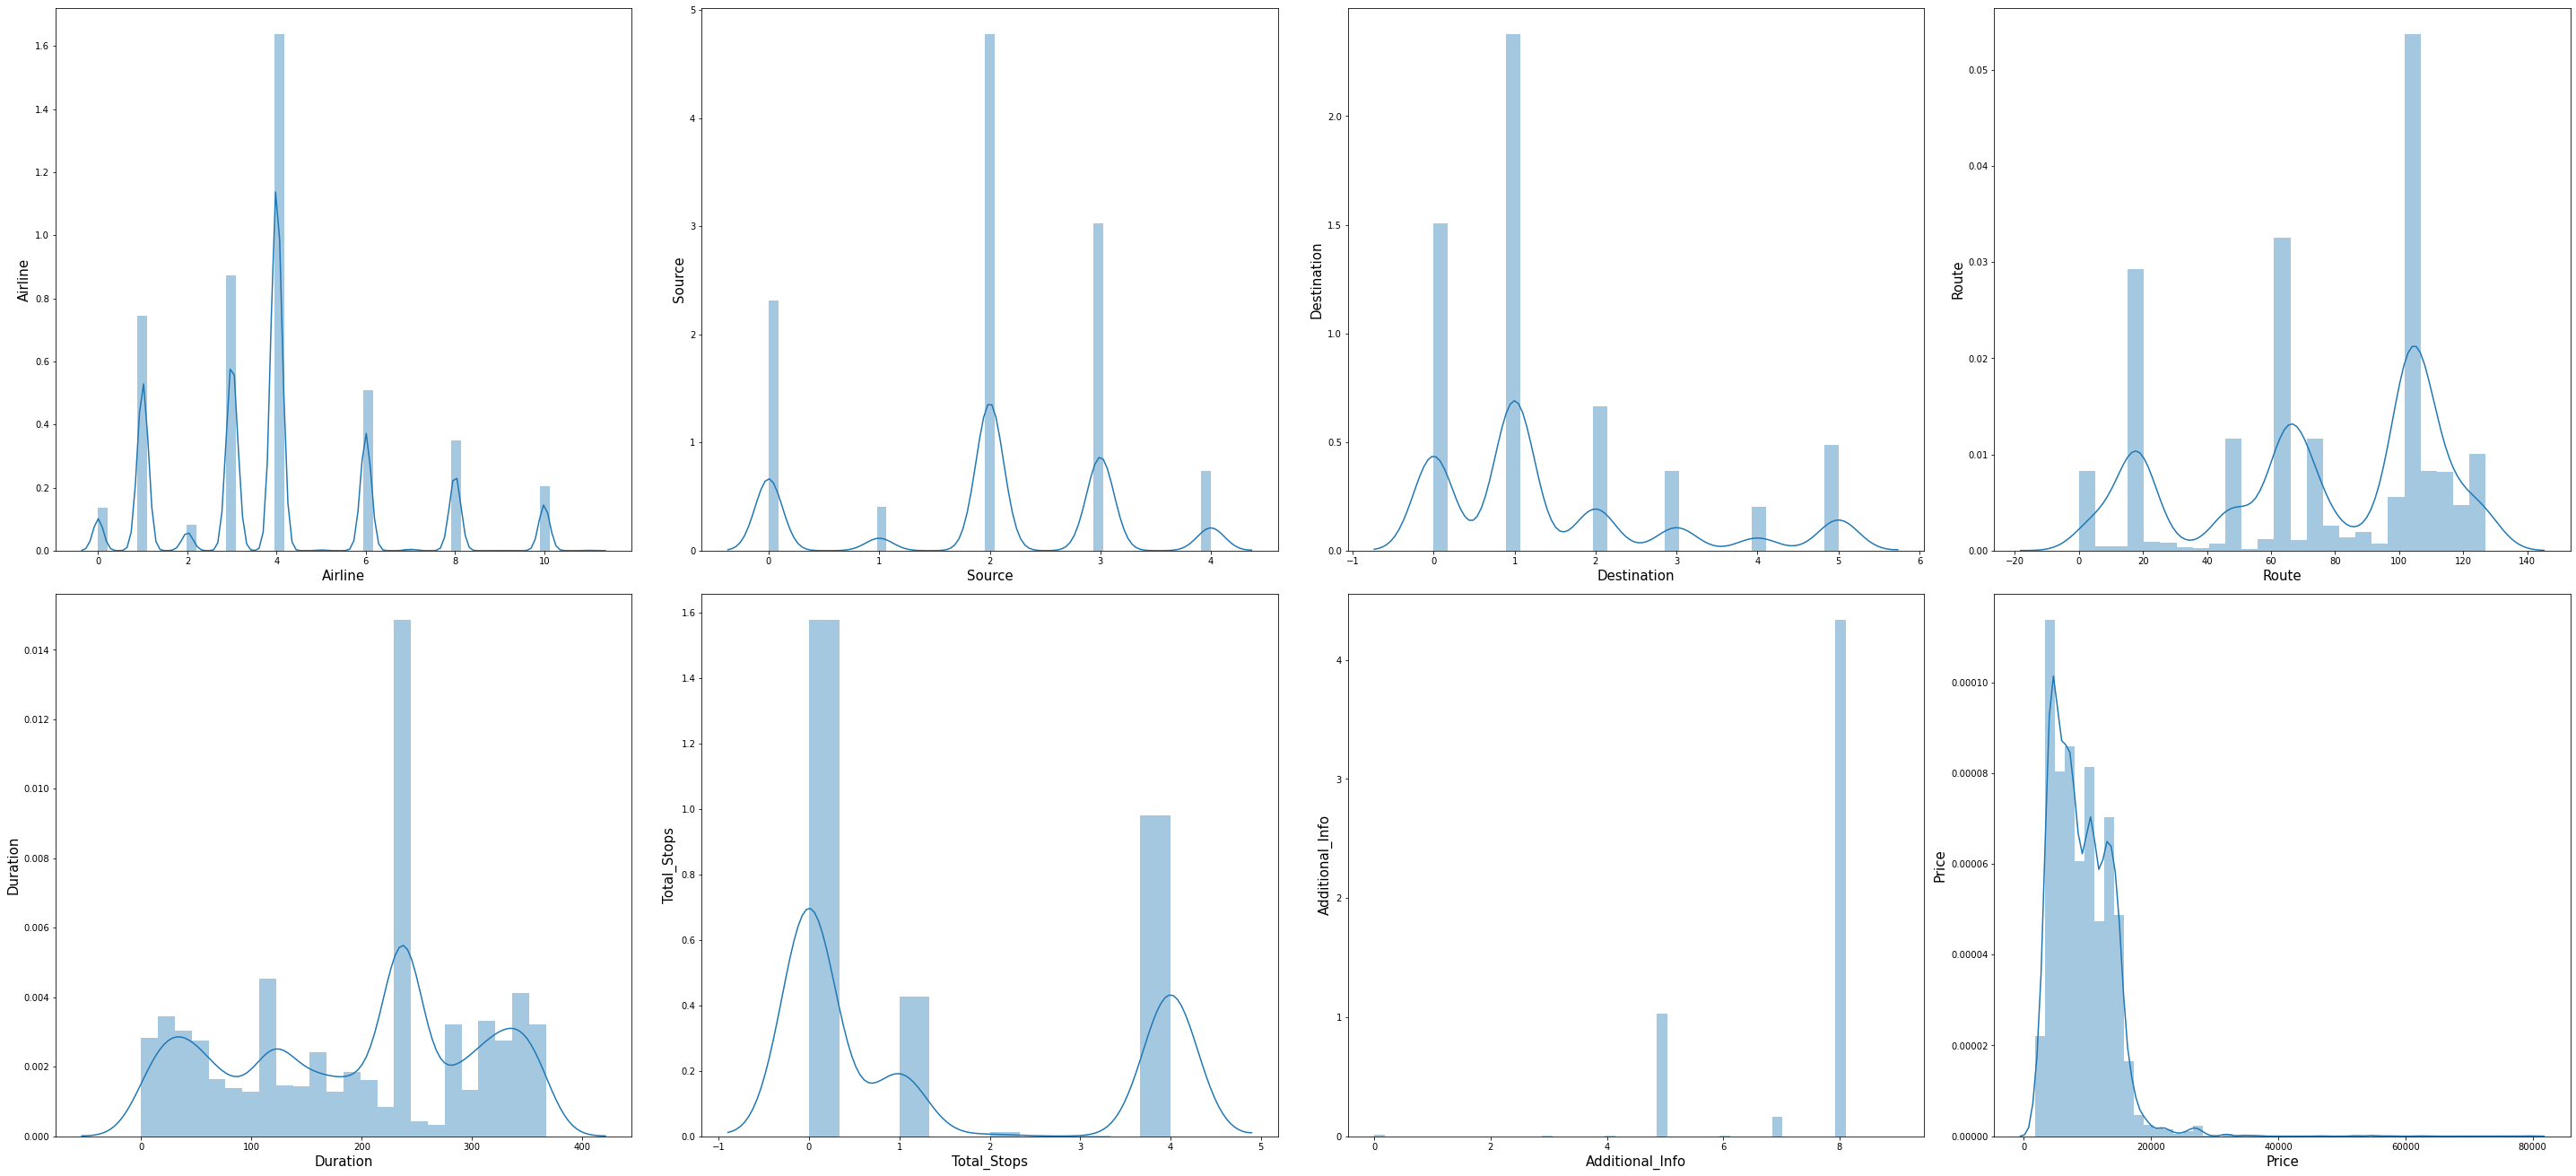

In [117]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [118]:
data["Price"]=np.log(data["Price"])

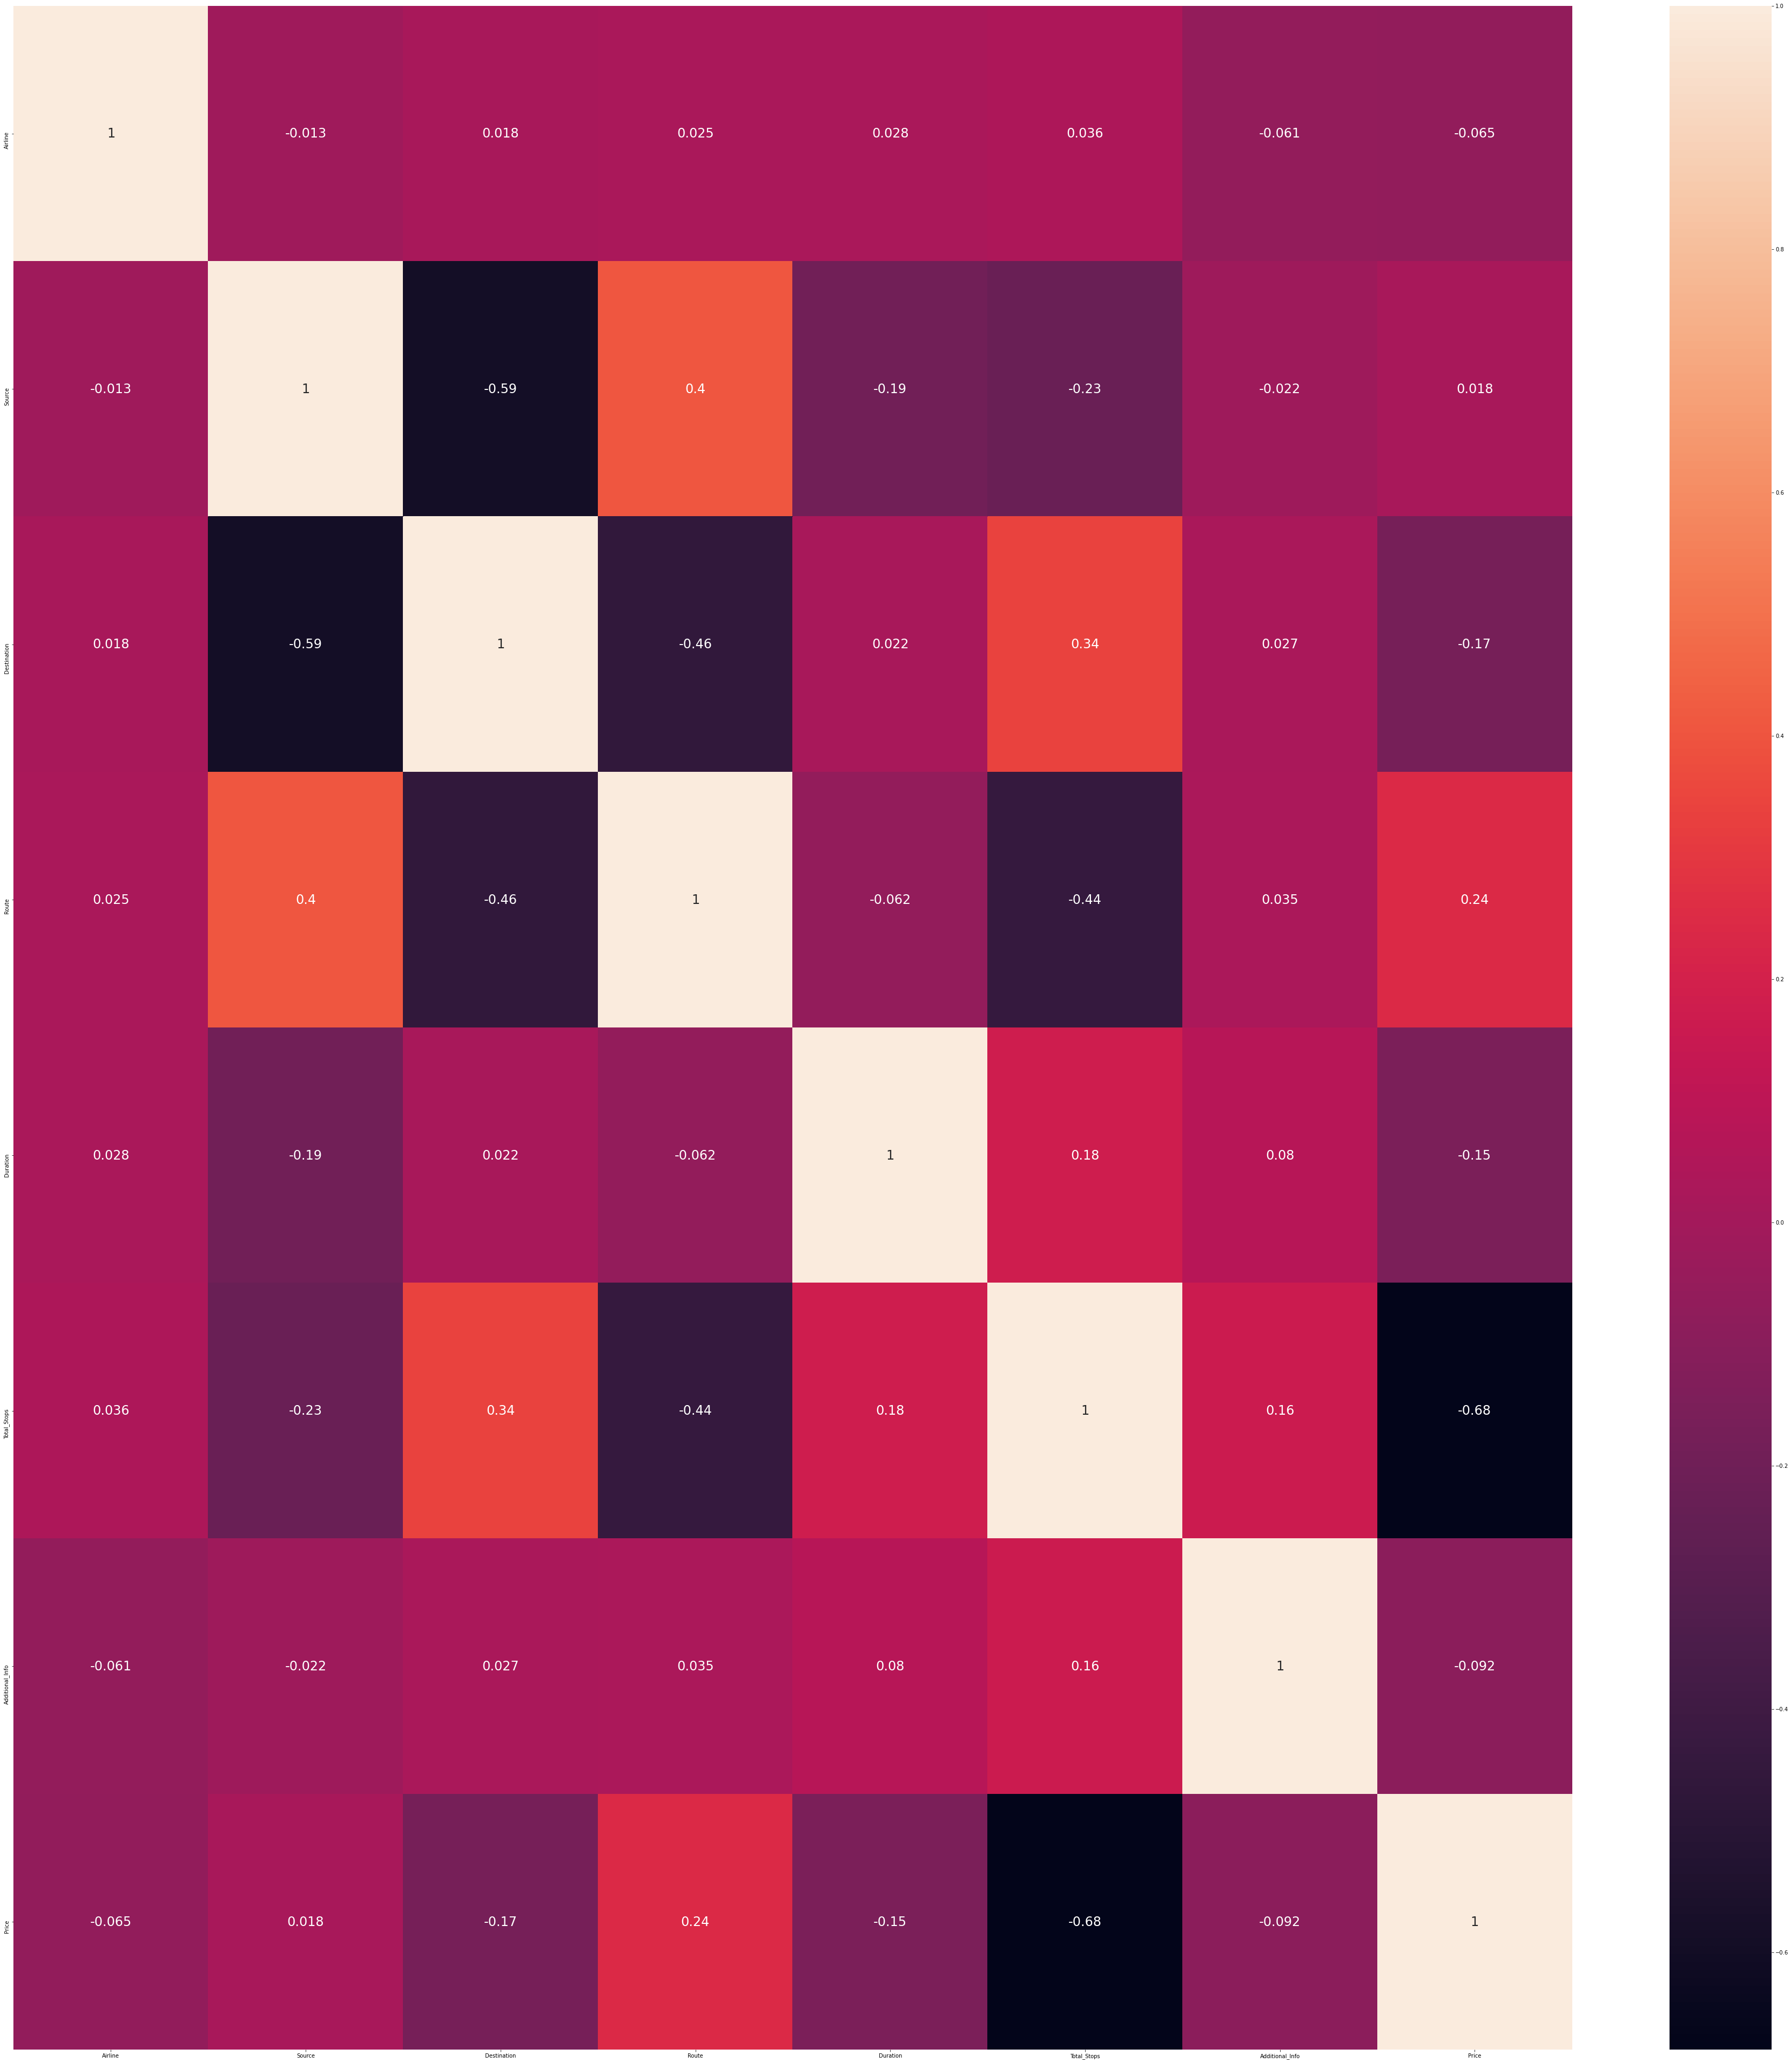

In [119]:
corr=data.corr()
corr.shape

plt.figure(figsize=(65,70))
sns.heatmap(corr,annot=True,annot_kws={'size':24}) 
plt.show()  

In [120]:
# Their is no correlation between parameters

In [121]:
from sklearn.feature_selection import SelectKBest,f_classif
x=data.drop("Price",axis=1)
y=data.Price

best_features=SelectKBest(score_func=f_classif,k=7)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(7,"Scores_obtained"))

      Column_names  Scores_obtained
5      Total_Stops       350.021759
3            Route       251.460602
1           Source       182.691925
2      Destination       110.977806
0          Airline        78.817513
6  Additional_Info        54.914658
4         Duration         3.499736


In [122]:
# Since all the features are important ,letsfit the dat anow..

In [123]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x



array([[-0.41080484, -1.65835945,  2.41653414, ...,  0.42282971,
         1.40720999,  0.49992092],
       [-1.26115217,  0.89001433, -0.97381203, ...,  1.3066437 ,
        -0.2537031 ,  0.49992092],
       [ 0.01436882,  0.04055641, -0.2957428 , ..., -0.81082732,
        -0.2537031 ,  0.49992092],
       ...,
       [ 0.01436882, -1.65835945,  0.38232644, ...,  0.79108554,
         1.40720999,  0.49992092],
       [ 2.56541078, -1.65835945,  2.41653414, ...,  0.40441692,
         1.40720999,  0.49992092],
       [-1.26115217,  0.04055641, -0.2957428 , ...,  1.40791406,
        -0.2537031 ,  0.49992092]])

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=46)



In [125]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

y_pred=lm.predict(x_test)
print("Training score:",lm.score(x_train,y_train))
print("Testing score:",lm.score(x_test,y_test))

Training score: 0.48027619868488536
Testing score: 0.5120286815779644


In [126]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm,x,y,cv=10).mean()

0.4870413766057175

In [127]:
#The data is not over/under fitting ..

In [128]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

y_pred=knr.predict(x_test)

print("training accuracy:",knr.score(x_train,y_train))
print("testing accuracy:",knr.score(x_test,y_test))

training accuracy: 0.8427537967769538
testing accuracy: 0.8054039674024265


In [129]:
cross_val_score(knr,x,y,cv=10).mean()

0.8130255066698344

In [130]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[7,8,9,10,12,14],
           "n_neighbors":[6,7,11,12,13]}

from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(estimator=knr,param_grid=param_grid)

In [131]:
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 7, 'n_neighbors': 7}

In [132]:
knr=KNeighborsRegressor(algorithm='brute',leaf_size=7,n_neighbors=7)
knr.fit(x_train,y_train)

y_pred=knr.predict(x_test)

print("training accuracy:",knr.score(x_train,y_train))
print("testing accuracy:",knr.score(x_test,y_test))

training accuracy: 0.8485173986700323
testing accuracy: 0.821744474175609


In [133]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred=dtr.predict(x_test)

print("training accuracy:",knr.score(x_train,y_train))
print("testing accuracy:",knr.score(x_test,y_test))

training accuracy: 0.8485173986700323
testing accuracy: 0.821744474175609


In [134]:
cross_val_score(dtr,x,y,cv=10).mean()

0.8124882126611205

In [135]:
param_grid={"max_depth":range(10,20),
           "min_samples_leaf":range(2,7),
           "min_samples_split":range(2,6)}

grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=5,n_jobs=-1) 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 20),
                         'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(2, 6)})

In [136]:
grid_search.best_params_

{'max_depth': 19, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [137]:
dtr=DecisionTreeRegressor(max_depth=19,min_samples_leaf=6,min_samples_split=2)
dtr.fit(x_train,y_train)

y_pred=dtr.predict(x_test)

print("training accuracy:",knr.score(x_train,y_train))
print("testing accuracy:",knr.score(x_test,y_test))

training accuracy: 0.8485173986700323
testing accuracy: 0.821744474175609


In [138]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor()

rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

rfr.score(x_train,y_train)
rfr.score(x_test,y_test)


0.8339035843130596

In [139]:
cross_val_score(rfr,x,y,cv=8).mean()

0.8248120674313848

In [140]:
param_grid={"max_depth":range(2,4),
           "min_samples_leaf":range(2,4),
           "min_samples_split":range(4,6)
           }

grid_search=GridSearchCV(rfr,param_grid=param_grid)

grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 4),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(4, 6)})

In [141]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}

In [142]:
rfr= RandomForestRegressor(max_depth=3,min_samples_leaf=3,min_samples_split=4)

rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print("Training scor:",rfr.score(x_train,y_train))
print("testing score",rfr.score(x_test,y_test))

Training scor: 0.6707746084966274
testing score 0.687058815456467


In [143]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

print("Training scor:",ada.score(x_train,y_train))
print("testing score",ada.score(x_test,y_test))

Training scor: 0.6137214478984387
testing score 0.6342597266209089


In [144]:
param_grid={"max_depth":range(2,4),
           "min_samples_leaf":range(2,4),
           "min_samples_split":range(4,6)
           }

grid_search=GridSearchCV(rfr,param_grid=param_grid)

grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=3, min_samples_leaf=3,
                                             min_samples_split=4),
             param_grid={'max_depth': range(2, 4),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(4, 6)})

In [145]:
y__preds=ada.predict(x_test)



In [146]:
print("training score",ada.score(x_train,y_train))
print("testing score",ada.score(x_test,y_test))

training score 0.6137214478984387
testing score 0.6342597266209089


In [147]:
# Having seen all 5 models, the best accuracy is 83%

In [148]:
import pickle 


In [149]:
final_model="flight.pickle"
pickle.dump(dtr,open(final_model,'wb'))